<a href="https://colab.research.google.com/github/rdbadrinathan19102004/Number_Detection/blob/main/pracrtical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_visualizer --upgrade

In [2]:
!pip install pillow
from PIL import Image
import numpy as np

In [3]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras_visualizer import visualizer
from keras.initializers import HeNormal

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, BatchNormalization
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0]
[  0  0  0  0  0  0  0  0 38165253233208 84

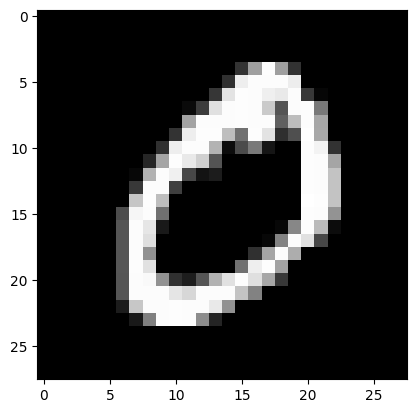

[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 67232 39  0  0  0  0  0]
[  0  0  0  0 62 81  0  0  0  0  0  0  0  0  0  0  0  0  0  0120180 39  0  0  0  0  0]
[  0  0  0  0126163  0  0  0  0  0  0  0  0  0  0  0  0  0  2153210 40  0  0  0  0  0]
[  0  0  0  0220163  0  0  0  0  0  0  0  0  0  0  0  0  0 27254162  0  0  0  0  0  0]
[  0  0  0  0222163  0  0  0  0  0  0  0  0  0  0  0  0  0183254125  0  0  0  0  0  0]
[  0  0  0 46245163  0  0  0  0  0  0  0  0  0  0  0  0  0198254 56  0  0  0  0  0  0]
[  0  0  0120254163  0  0  0  0  0  0  0  0

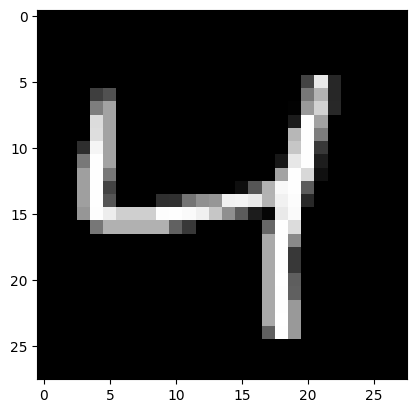

[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0124253255 63  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 96244251253 62  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0127251251253 62  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 68236251211 31  8  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 60228251251 94  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0155253253189  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0

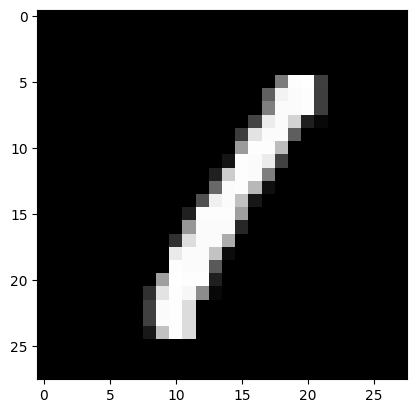

[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0  0 55148210253253113 87148 55  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  0  0 87232252253189210252252253168  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0  4 57242252190 65  5 12182252253116  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0  0 96252252183 14  0  0 92252252225 21  0  0  0  0  0  0  0]
[  0  0  0  0  0  0  0  0132253252146 14  0

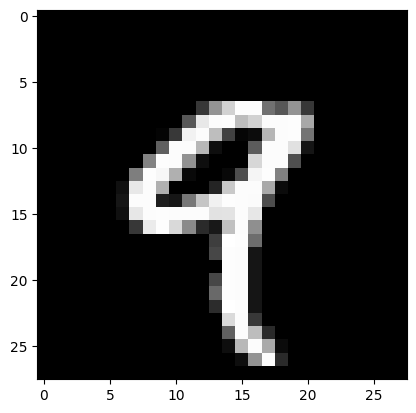

In [5]:
for i in range(1, 5):
    # Get the current example
    example = x_train[i]

    # Print each row of the example on its own line
    for row in example:
        print('[' +''.join(f"{val:3d}" for val in row) +']')

    # Add separator between examples
    print('-' * 80)

    plt.imshow(x_train[i],cmap='gray')#gray scale
    print("Y - data:", y_train[i])
    plt.show()


In [6]:
#categorization
#one hot encoding
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [8]:
#no need to do flattening as in CNN it is done automatically

In [9]:
#CNN ARCHITECTURE

In [10]:
x_train.shape[1],x_train.shape[2]

(28, 28)

In [11]:
initializer = HeNormal()

In [12]:
model = Sequential()

In [13]:

model.add(Conv2D(input_shape = (x_train.shape[1], x_train. shape[2], 1), filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu',kernel_initializer=initializer))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu',kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dense(units=10, activation='softmax',kernel_initializer=initializer))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 13, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,030 (457.15 KB)

 Trainable params: 116,830 (456.37 KB)

 Non-trainable params: 200 (800.00 B)

In [15]:
#output size=( [ input size - filter size + 2 * padding ] / stride) + 1

In [16]:
#1 . con 2d

In [17]:
#here input size= 28,28 ; filter = 3 * 3 ; stride= 2 *2; paddind= no ;

In [18]:
((x_train.shape[1] - 3 + 2 * 0) / 2) + 1

13.5

In [19]:
#( 3 * 3 +1) * 32 =320

In [20]:
#2. max pooling

In [21]:
#input for max= 13,13

In [22]:
#13/2=6

In [23]:
#3. output shape

In [24]:
#6,6,32 = 1152

In [25]:
#3.flatten

In [26]:
# 4.dense

In [27]:
#input 1152 ; neuron 8; bias 8

In [28]:
#parameters = 1152 * 8 + 8 =9224

In [29]:
#5 . batch normalization

In [30]:
#input 8; output = 8;

In [31]:
#mean, sd, beta and epsilon=4

In [32]:
#4 * 8 =32

In [33]:
visualizer(model, file_name='graph_classification', file_format='png', view=False, settings=None)

In [34]:
adam_optimizer= Adam()
categorical_loss= CategoricalCrossentropy()
model.compile(optimizer=adam_optimizer,loss=categorical_loss,metrics=['accuracy'])

In [35]:
history=model.fit(x_train, Y_train, epochs=25, batch_size=10, validation_data=(x_test,Y_test), verbose=1)

Epoch 1/25
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8930 - loss: 0.3494 - val_accuracy: 0.9693 - val_loss: 0.1180
Epoch 2/25
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9574 - loss: 0.1445 - val_accuracy: 0.9680 - val_loss: 0.1350
Epoch 3/25
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9690 - loss: 0.0997 - val_accuracy: 0.9796 - val_loss: 0.0689
Epoch 4/25
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9742 - loss: 0.0834 - val_accuracy: 0.9797 - val_loss: 0.0828
Epoch 5/25
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9768 - loss: 0.0759 - val_accuracy: 0.9817 - val_loss: 0.0881
Epoch 6/25
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9788 - loss: 0.0681 - val_accuracy: 0.9836 - val_loss: 0.0533
Epoch 7/25
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9804 - loss: 0.0627 - val_accuracy: 0.9806 - val_loss: 0.1086
Epoch 8/25
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9820 - loss: 0

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9984 - loss: 0.0437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9847 - loss: 0.0758
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

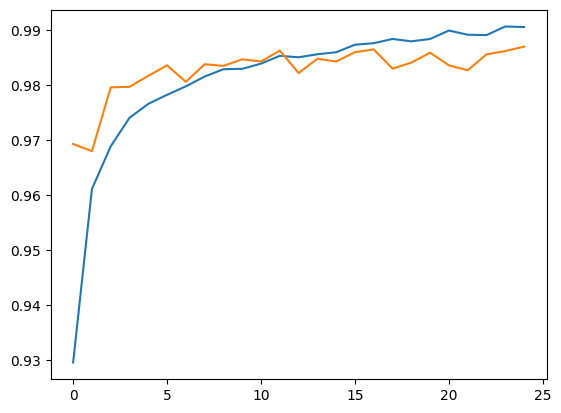

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model.evaluate(x_train, Y_train)
model.evaluate(x_test,Y_test)

np.argmax(model.predict(x_test),axis=1)

In [37]:
image= Image.open('four_img.png')

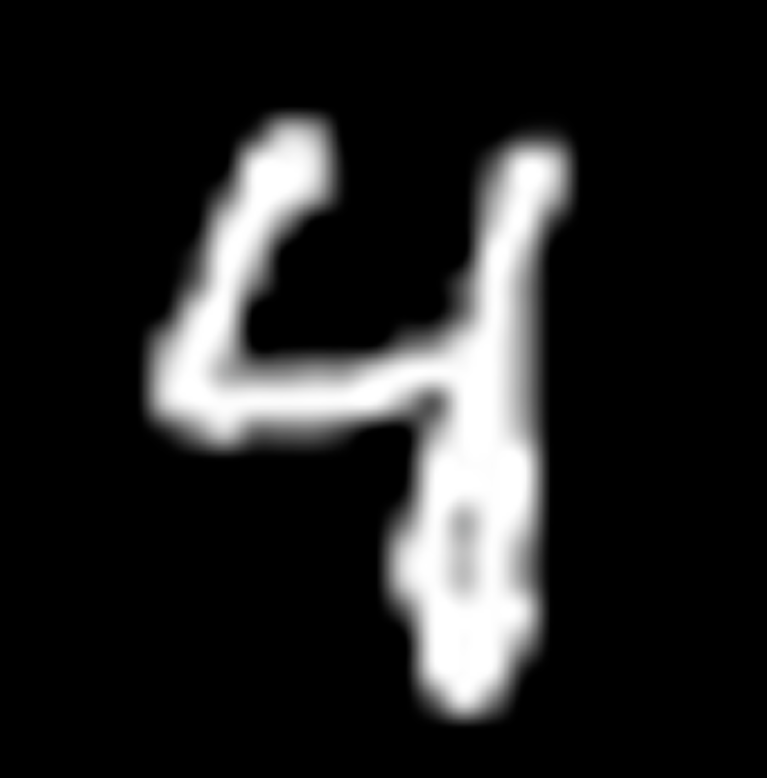

In [38]:
image

In [39]:
#convert to gray scale

In [40]:
image=image.convert('L')

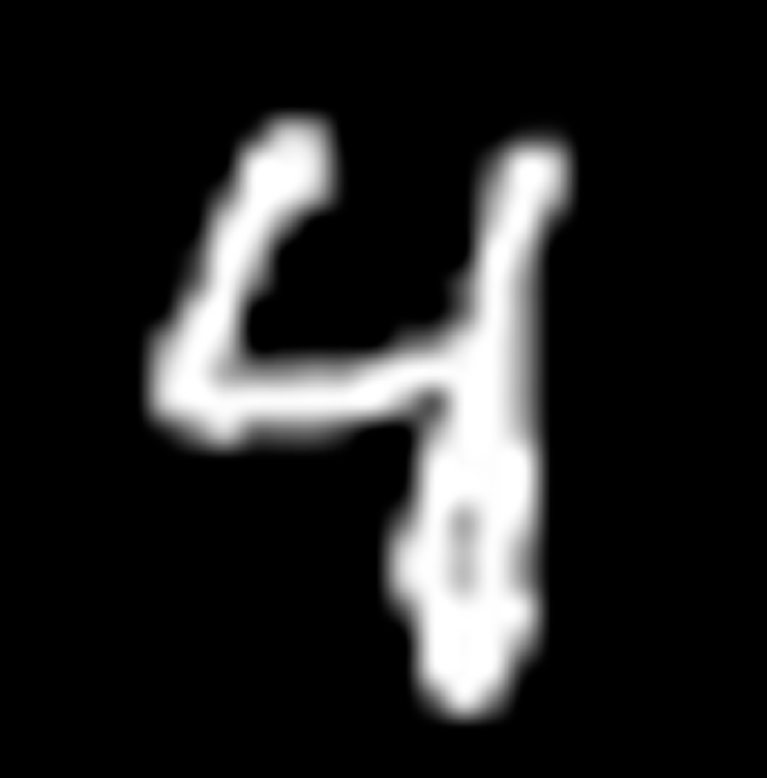

In [41]:
image

In [42]:
np.array(image).shape

(778, 767)

In [43]:
image=image.resize((28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


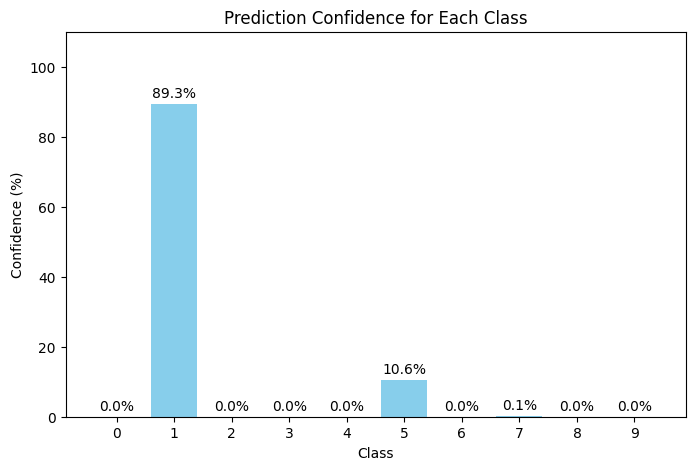

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (grayscale), update 'your_image_path.png' as needed
image = cv2.imread('four_img.png', cv2.IMREAD_GRAYSCALE)

# Resize to 28x28 if it's not already
image = cv2.resize(image, (28, 28))

# Invert if needed (MNIST digits are white on black)
image = 255 - image

# Normalize and reshape
image_array = image.astype("float32") / 255.0
image_array = image_array.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(image_array)

# Plot bar chart of prediction confidence
percentages = prediction[0] * 100
classes = np.arange(len(percentages))

plt.figure(figsize=(8, 5))
bars = plt.bar(classes, percentages, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Confidence (%)')
plt.title('Prediction Confidence for Each Class')
plt.xticks(classes)

for bar, percent in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{percent:.1f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.show()


In [46]:
np.argmax(prediction)

np.int64(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


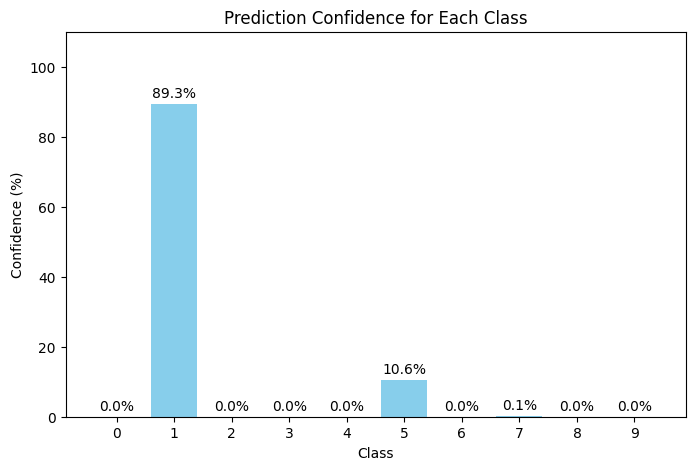

In [47]:

# Predict
prediction = model.predict(image_array)

# Get class probabilities
percentages = prediction[0] * 100
classes = np.arange(len(percentages))  # e.g., [0, 1, 2, ..., 9]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(classes, percentages, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Confidence (%)')
plt.title('Prediction Confidence for Each Class')
plt.xticks(classes)

# Annotate each bar with percentage
for bar, percent in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{percent:.1f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.show()


In [48]:
image= Image.open('three_img.png')

In [49]:
image=image.convert('L')

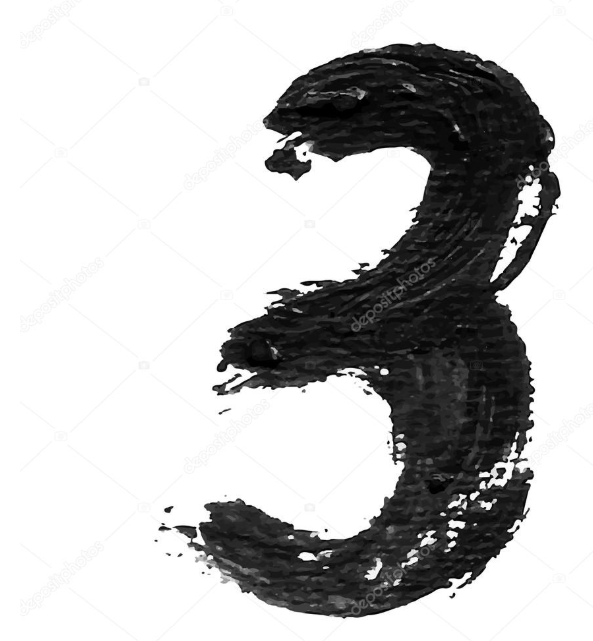

In [50]:
image

In [51]:
np.array(image).shape

(641, 593)

In [52]:
image=image.resize((28,28))

In [53]:
image=Image.open('three_img.png').convert('L')
image=image.resize((28,28))
image_array=np.array(image)/255.0
image_array=image_array.reshape(1,28,28,1)

prediction=model.predict(image_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[5.0081507e-08 9.9918216e-01 5.5243072e-06 1.6517340e-07 3.0857572e-07
  2.2404033e-04 3.6849670e-09 5.8777968e-04 2.1667021e-16 4.5928672e-10]]


In [54]:
np.argmax(prediction)

np.int64(1)

In [55]:
np.array(image)

array([[255, 255, 252, 253, 255, 255, 255, 255, 255, 255, 253, 254, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        253, 255],
       [255, 252, 254, 255, 254, 255, 255, 255, 255, 254, 255, 254, 254,
        255, 255, 255, 255, 252, 232, 225, 233, 255, 255, 255, 255, 254,
        255, 254],
       [255, 255, 255, 255, 255, 254, 255, 255, 254, 255, 255, 255, 255,
        255, 248, 188, 115,  78,  52,  31,  39,  77, 136, 215, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 253, 254, 255, 255, 255, 255, 255,
        215,  85,  30,  25,  21,  24,  32,  20,  21,  16,  34, 159, 255,
        255, 255],
       [255, 255, 255, 255, 255, 254, 255, 254, 255, 255, 255, 255, 230,
         63,  20,  20,  25,  19,  14,  22,  22,  18,  18,  14,  26, 196,
        255, 255],
       [255, 254, 255, 255, 254, 255, 255, 255, 255, 254, 255, 254, 187,
         56,  25,  11,   9,   9,   8,   9,  12,  24,  18,  20,  12,  61,
        236, 255],
       [255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 252, 254, 225,
        100, 134,  64,  71, 116, 151, 118,  24,  11,  14,  20,  16,  34,
        227, 255],
       [255, 254, 255, 254, 255, 255, 255, 255, 254, 252, 254, 255, 207,
        107, 178, 247, 251, 255, 255, 255,  87,  12,  16,  17,  38,  75,
        212, 255],
       [255, 255, 255, 255, 255, 254, 255, 255, 254, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 233,  46,  16,  16,  11, 128, 129,
        162, 255],
       [255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255,
        255, 253, 254, 255, 255, 255, 155,  23,  25,  23,  23, 130, 104,
        232, 255],
       [255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 255, 255,
        254, 255, 255, 255, 255, 195,  47,  23,  25,  27,  72, 144, 154,
        255, 255],
       [255, 254, 255, 254, 253, 255, 255, 255, 254, 254, 255, 255, 255,
        255, 255, 255, 240, 170,  50,  29,  32,  28,  30, 117, 111, 235,
        255, 255],
       [255, 255, 253, 252, 254, 255, 255, 255, 255, 255, 254, 255, 250,
        192, 160,  98,  73,  27,  35,  39,  33,  28,  24,  97, 221, 255,
        254, 254],
       [255, 253, 252, 254, 255, 255, 255, 255, 255, 254, 255, 245, 165,
         43,  27,  19,  22,  38,  38,  27,  22,  19,  16,  77, 239, 255,
        254, 254],
       [255, 253, 255, 255, 254, 254, 255, 255, 254, 255, 219,  65,  22,
         21,  24,  22,  27,  29,  20,  22,  19,  19,  21,  16, 153, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 253, 254, 255, 255, 141,  18,  17,
         24,  23,  23,  30,  28,  30,  28,  31,  31,  23,  18,  66, 247,
        255, 255],
       [255, 255, 255, 255, 255, 255, 254, 254, 255, 252, 185, 148,  66,
         66,  88, 144, 196,  93,  34,  37,  42,  48,  26,  18,  40, 223,
        255, 255],
       [255, 255, 255, 255, 254, 254, 255, 255, 254, 252, 216, 237, 243,
        246, 253, 255, 255, 224,  77,  32,  36,  44,  29,  23,  35, 220,
        255, 254],
       [255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 252, 254, 255,
        255, 255, 255, 255, 255, 149,  26,  32,  40,  28,  22,  49, 228,
        254, 252],
       [255, 255, 254, 254, 255, 255, 255, 255, 255, 253, 253, 254, 255,
        255, 255, 255, 255, 255, 177,  47,  31,  29,  29,  33, 135, 249,
        254, 255],
       [255, 254, 255, 255, 254, 255, 255, 255, 254, 254, 255, 255, 255,
        255, 255, 255, 254, 255, 222,  54,  35,  23,  50, 130, 150, 234,
        255, 255],
       [255, 255, 255, 255, 255, 254, 254, 253, 255, 252, 228, 231, 255,
        255, 255, 254, 255, 255, 156,  36,  30,  60,  92,  81,  57, 240,
        255, 255],
       [255, 255, 255, 255, 255, 255, 254, 236, 229, 192,  58,  56, 127,
        211, 252, 255, 255, 201,  44,  37,  44,  94,  56,  27, 104, 254,
        255, 255],
       [255, 255, 255, 255, 254, 254, 255, 242, 206, 107,  30,  32,  28,
         55, 110, 162, 138,  53,  43,  66,  91,  80,  18,  39, 218, 255,
        255, 255],
       [255, 255, 254, 252, 253, 255, 25

[255255252253255255255255255255253254255255255255255255255255255255255255255255253255]
[255252254255254255255255255254255254254255255255255252232225233255255255255254255254]
[255255255255255254255255254255255255255255248188115 78 52 31 39 77136215255255255255]
[255255255255255255253254255255255255255215 85 30 25 21 24 32 20 21 16 34159255255255]
[255255255255255254255254255255255255230 63 20 20 25 19 14 22 22 18 18 14 26196255255]
[255254255255254255255255255254255254187 56 25 11  9  9  8  9 12 24 18 20 12 61236255]
[255255254254255255255255255255252254225100134 64 71116151118 24 11 14 20 16 34227255]
[255254255254255255255255254252254255207107178247251255255255 87 12 16 17 38 75212255]
[255255255255255254255255254254255255255255255255255255255233 46 16 16 11128129162255]
[255255255255255255254254255255255255255255253254255255255155 23 25 23 23130104232255]
[255255255255255254254254255255255255255254255255255255195 47 23 25 27 72144154255255]
[255254255254253255255255254254255255255255

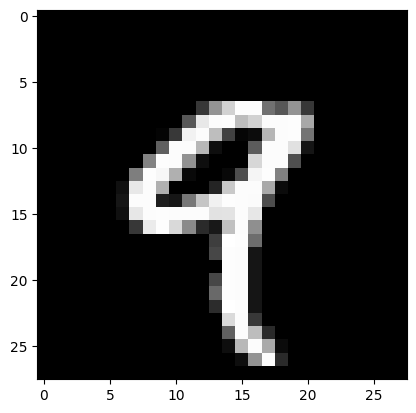

In [56]:
example = np.array(image)
# Print each row of the example on its own line
for row in example:
    print('[' +''.join(f"{val:3d}" for val in row) +']')

    # Add separator between examples
print('-' * 80)

plt.imshow(x_train[i],cmap='gray')#gray scale
print("Y - data:", y_train[i])
plt.show()


In [57]:
image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


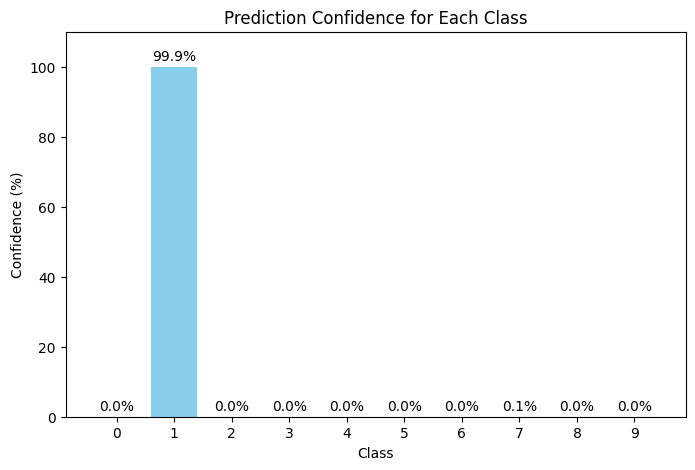

In [58]:

# Predict
prediction = model.predict(image_array)

# Get class probabilities
percentages = prediction[0] * 100
classes = np.arange(len(percentages))  # e.g., [0, 1, 2, ..., 9]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(classes, percentages, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Confidence (%)')
plt.title('Prediction Confidence for Each Class')
plt.xticks(classes)

# Annotate each bar with percentage
for bar, percent in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{percent:.1f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.show()
